In [1]:
import sys
import os

def get_FGCE_Directory():
    """Get the path of the 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness' directory."""
    current_dir = os.getcwd()
    target_dir = 'FGCE-Feasible-Group-Counterfactual-Explanations-for-Auditing-Fairness'
    
    while os.path.basename(current_dir) != target_dir:
        current_dir = os.path.dirname(current_dir)
        if current_dir == os.path.dirname(current_dir):
            return None
        
    return current_dir

def get_system_slash():
    """Get the system-specific directory separator."""
    return os.sep

FGCE_DIR = get_FGCE_Directory()
sys.path.append(FGCE_DIR)
sep = get_system_slash()
sys.path.append(FGCE_DIR + get_system_slash() + 'src')
from main import *

2024-08-12 23:22:31.195294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 23:22:31.195317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 23:22:31.196182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-12 23:22:31.200350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-12 23:22:31.731649: W tensorflow/compiler/tf2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14

def plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, d_method, max_d, show_legends=True):
    fig, ax1 = plt.subplots()

    # Adjust the x values slightly to avoid overlap
    x_values = range(1, len(face_wij)+1)
    x_values_offset = [x + 0.1 for x in x_values]

    ax1.plot(x_values, face_wij, '-o', color='green', label="FACE Wij Distance", alpha=0.7)
    ax1.plot(x_values_offset, gfce_wij, '-o', color='blue', label="FGCE Wij Distance", alpha=0.7)
    ax1.set_xlabel("k")
    ax1.set_ylabel("Avg Wij Distance")
    ax1.set_xticks(range(1, len(face_wij)+1))

    ax2 = ax1.twinx()

    ax2.plot(x_values, face_dists, '-o', label="FACE Vector Distances", alpha=0.7)
    ax2.plot(x_values_offset, gfce_dists, '-o', label="FGCE Vector Distances", alpha=0.7)
    ax2.set_ylabel("Avg Vector Distance")

    if show_legends:
        handles1, labels1 = ax1.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        handles = handles1 + handles2
        labels = labels1 + labels2
        ax1.legend(handles, labels, loc='lower right')

    plt.tight_layout()
    fig_size = (6, 4) 
    plt.gcf().set_size_inches(fig_size)
    plt.savefig(f"{FGCE_DIR}/tmp/{datasetName}/figs/Coverage_constrained_face_gface_comparison_d_method_{d_method}_maxd_{max_d}_normalized.pdf")

    plt.show()

# Student dataset

In [ ]:
face_dists = []
face_wij = []
gfce_dists = []
gfce_wij = []
datasetName = "Student"
max_d = 1000000000
for k in range(1, 6, 1):
    print(f"Running for {k}th time")

    results, data_np, attr_col_mapping, data_df_copy, face_vector_distances, gfce_vector_distances, face_wij_distances, gfce_wij_distances = main_coverage_constrained_GCFEs(epsilon=3, tp=0.6, td=0.001,
                            datasetName=datasetName, group_identifier='sex',
                            classifier='lr', compare_with_Face= True,
                            skip_model_training=True, skip_graph_creation=True, skip_gcfe_calculation=False,
                            k=k, max_d = max_d, cost_function="max_path_cost")

    if face_vector_distances == None:
        continue
    face_dists.append(face_vector_distances)
    gfce_dists.append(gfce_vector_distances)
    face_wij.append(face_wij_distances)
    gfce_wij.append(gfce_wij_distances)

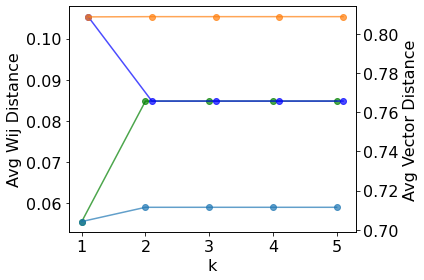

In [ ]:
plot(datasetName, face_dists, gfce_dists, face_wij, gfce_wij, "max_path_cost", max_d, show_legends=False)

Similar comparison with other datasets can be done by changing the `datasetName` and `group_identifier` variables.